# 0. Введение.

Привет! Эта лабораторная работа про то, какие есть способы сбора данных с сайтов. Давай начнём с небольшого введения про то, как её выполнять.

В коде и тексте этой лабораторной работы встречаются блоки двух видов. Первый из них будет в ячейках с кодом и выглядит он так:


```
# TODO
```

Это означает, что тут надо написать одну или несколько строчек кода.

Второй тип блоков выглядит так - <font color='violet'> \# TODO </font>. Он означает, что тут надо написать какие-то свои мысли и выводы. Когда будешь писать, пожалуйста, не меняй цвет текста твоего ответа - это упростит проверку.

В тексте внизу собраны все нужные библиотечки - запускаем её и начинаем выполнение лабораторной работы! :)

In [8]:
from urllib.request import urlopen
from urllib.parse import urlparse, urldefrag, urljoin, unquote
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import json

# Часть 1. Работа со статическими страницами при помощи bs4. 3 балла.



В этой части вам не нужно работать с маркетплейсами или сложными крупными онлайн-магазинами, достаточно поиграться с **небольшим нишевым магазинчиком**.

Пример сайта, подходящего под задание:
- Семена овощей - Аэлита https://ailita-shop.ru/


Вам нужно найти ПОХОЖИЙ сайт без динамической подгрузки контента (таких в интернете очень много)

Для формирования представления о магазине достаточно посмотреть на товары одной выбранной категории.

На странице товара **должна содержалась следующая информация, которую вам надо будет получить в рамках задания**:

- Название
- Картинка
- Характеристики (минимум 1)
- Описание

Описание должно быть достаточно большим (больше одного предложения) и содержать информацию о характеристиках товара. Например, как это бывает на алиэкспрессе

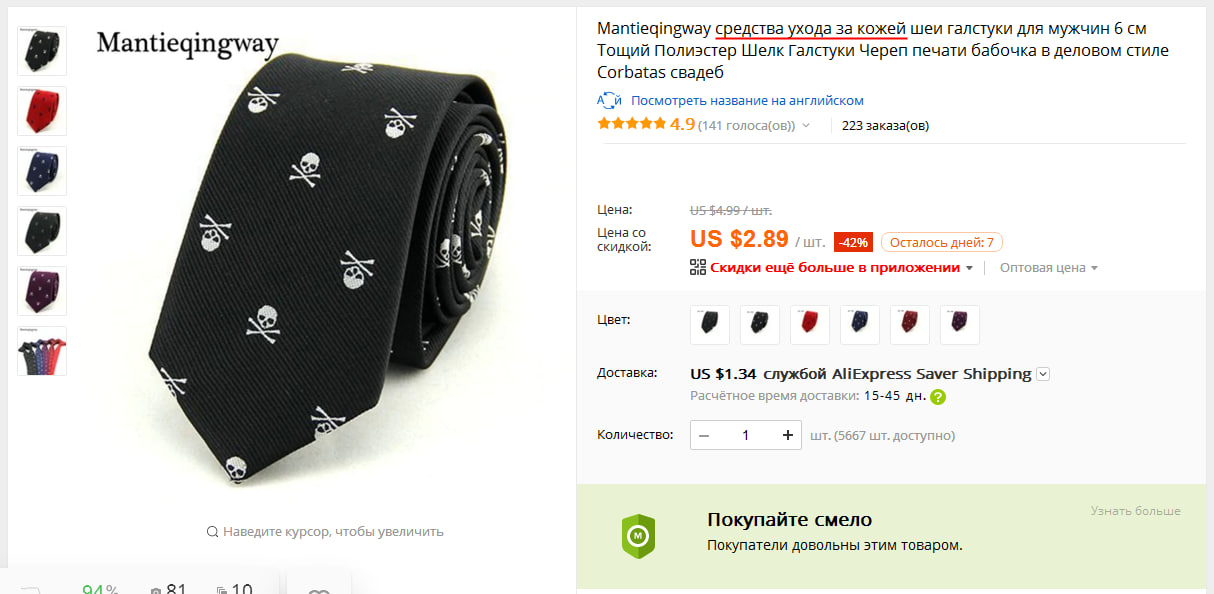

## Исследование

Выберите магазин, который удовлетворяет описанию магазина-конкурента:

<font color='violet'> vodaipivo.ru </font>

Выберите категорию товаров и посмотрите на предлагаемые карточки товаров. **Категория должна содержать 20+ карточек, чтобы можно было составить более полное мнение о товарах в магазине.**

In [46]:
url = 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/'

Откройте ссылку с помощью библиотеки `urllib` и загрузите данные в переменную `html`. Не забудь про кодировку!

In [47]:
response = urlopen(url)
html = response.read()
html = html.decode('utf-8')

Распарсьте текстовую информация на странице, используя библиотеку `bs4`



In [49]:
soup = BeautifulSoup(html, 'html')

Найдите все узлы href на странице

In [50]:
hrefs = soup.find_all('a')

Сохраните полные адреса сслыкок в список


Подсказка: используйте `urljoin`

In [56]:
links = [urljoin(url, link.get('href')) for link in hrefs]
links[-30:]

['https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/?add_to_wishlist=2562&_wpnonce=7cdf7352af',
 'https://vodaipivo.ru/product/ajhbaum-hefevajsbir-0-5zh-5-2/',
 'https://vodaipivo.ru/product/ajhbaum-hefevajsbir-0-5zh-5-2/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/2/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/3/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/4/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/6/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/7/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/8/',
 'https://vodaipivo.ru/product-category/pivo/pivo-po-stranam/nemeckoe-pivo/page/2/',
 'https://vodaipivo.ru/about-us/',
 'https://vodaipivo.ru/privacy-policy/',
 'https://vodaipivo.ru/pravila-i-uslovija/',
 'https://vodaipivo.ru/contact-us/',


Какие ссылки соответствуют карточкам товаров? Выберите все такие ссылки. Для этого напишем функцию фильтрации, которая будет определять, является ли ссылка корректной

In [ ]:
def filter(links, keyword='https://vodaipivo.ru/product/'):
    filtered_links = []
    new_links = []
    for link in links:
        new_link = unquote(link)
        if keyword in new_link:
            flag_check = True
            if flag_check:
                filtered_links.append(link)
                new_links.append(new_link)
    return filtered_links

In [ ]:
filtered_links = filter(links)

 На странице могло быть несколько ссылок, ведущих на одну и ту же карточку товара. Избавьтесь от дубликатов в списке ссылок

In [ ]:
filtered_links = list(set(filtered_links))
filtered_links

['https://vodaipivo.ru/product/pivo-duff-0-5-zh-b-svetloe-filtrovannoe/',
 'https://vodaipivo.ru/product/avgustiner-lager-hell-mjunhen-0-5-st-5-2/',
 'https://vodaipivo.ru/product/ajhbaum-premium-pilsener-svet-4-8-0-5zh/',
 'https://vodaipivo.ru/product/ajhbaum-festbir-svet-s-temnym-ottenkom-0-95zh-5-5-nabor/',
 'https://vodaipivo.ru/product/ajhbaum-hefevajsbir-0-5zh-5-2/',
 'https://vodaipivo.ru/product/brauperle-pils/',
 'https://vodaipivo.ru/product/ajhbaum-staut-0-5zh-7-5-tem/',
 'https://vodaipivo.ru/product/ajhbaum-rjed-0-5zh-5-9-svet/',
 'https://vodaipivo.ru/product/karamalz-fresh-lemon-alk-0-0-33-steklo/',
 'https://vodaipivo.ru/product/ajhbaum-premium-bir-0-5zh-5-5-svet/',
 'https://vodaipivo.ru/product/avgustiner-jedelshtof-0-5-st-5-6/',
 'https://vodaipivo.ru/product/ajhbaum-lager-0-5-zh-b/']

Сколько получилось ссылок?

In [ ]:
len(filtered_links)

12

Теперь, когда у нас есть ссылки на товары, давайте проанализируем, что этот магазин продает. Откройте страницу товара и посмотрите, какая информация там представлена и какую информацию вы хотите сохранить. **Обязательные** колонки:

- Название
- Картинка
- Характеристики (минимум 1) - для одежды это может быть ткань, из которой  она сшита, для семян овощей - срок созревания и.т.д.
- Описание

Можно **(и даже стоит)** добавить больше колонок, если получается выгрузить такую информацию.

In [ ]:
columns = ['Name', 'Image', 'Volume, ml', 'Price, RUB', 'Description']

Напишите функцию, которая принимает ссылку на страницу и возвращает все необходимые признаки. Для этого давайте поймем, как работать сначала с одной ссылкой

Выберите первую ссылку из списка

In [ ]:
first_link = filtered_links[0]

Распечатайте ее

In [ ]:
first_link

'https://vodaipivo.ru/product/pivo-duff-0-5-zh-b-svetloe-filtrovannoe/'

Используя библиотеку `requests` загрузите данные по сслыке и распартье их, как вы это делали ранее

In [ ]:
soups = []

for i in range(len(filtered_links)):
  response = urlopen(filtered_links[i])
  html = response.read()
  html = html.decode('utf-8')
  soups.append(BeautifulSoup(html, 'html'))

Посмотрите на полученные данные. В каком узле находится название товара? Сохраните этот узел и достаньте название товара

In [ ]:
#Name

names = []

for i in range(len(soups)):
  name = soups[i].find_all('h1')[0]
  names.append(name.getText())

Проделайте аналогичные шаги, чтобы получить информацию для оставшихся колонок

In [ ]:
#Image

images = []

for i in range(len(soups)):
  image = soups[i].find_all('img')[4]
  images.append(image['src'])

In [ ]:
#Parametrs: volume and price

volumes = []
prices = []

for i in range(len(soups)):
  volume = soups[i].find_all('p', string=lambda t: t and '0 мл' in t)
  volumes.append(volume[0].getText()[:-3])

for i in range(len(soups)):
  price = soups[i].find_all('p', class_='price')
  prices.append(price[0].getText()[:-1])

Достаньте описание товара

In [ ]:
#Description

descriptions = []

for i in range(len(soups)):
  description = soups[i].find_all('p')
  description = [p for p in description if p.find('strong')]
  descriptions.append(description[0].getText())

descriptions

['DUFF BEER — пиво светлое фильтрованное пастеризованное,цвет светло янтарный,с легкой горчинкой.Любимое пиво\xa0Гомера Симпсона',
 'Пиво «Августинер» Лагербир Хель хорошо сочетается с блюдами немецкой кухни, сырами, салатами, свининой, рыбой и морепродуктами.',
 '«Eichbaum» Pilsener — пиво премиум-класса, неоднократно завоевывавшее престижные награды на известных пивных конкурсах, в том числе золотую медаль на известном немецком конкурсе DLG.',
 'Пиво «Eichbaum» Festbier демонстрирует приятный солодовый вкус с легкой хмелевой горчинкой и гармоничным послевкусием.',
 '«Eichbaum» HefeWeizen — светлое пшеничное пиво верхнего брожения со слегка острым вкусом и чудесно освежающим финишем.',
 '«Brauperle» Premium Pils — светлый немецкий пилснер премиум класса, сваренный из воды, ячменного солода и хмеля без добавления консервантов.',
 '«Eichbaum» Stout — пиво темно-коричневого цвета. Вкус пива мягкий, согревающий. В насыщенном аромате пива преобладают тона солода, шоколадные нюансы.',
 '«Ei

In [ ]:
#Forming dataframe

data = pd.DataFrame(columns=columns)

for i in range(len(soups)):
  product = pd.DataFrame({'Name' : [names[i]], 'Image' : [images[i]], 'Volume, ml' : [volumes[i]], 'Price, RUB' : [prices[i]], 'Description' : [descriptions[i]]})
  data = pd.concat([data.iloc[:1], product, data.iloc[1:]], ignore_index=True)

data

,Name,Image,"Volume, ml","Price, RUB",Description
0,"Duff beer Halloween 0,5 ж/б светлое фильтрован...",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"100,00",DUFF BEER — пиво светлое фильтрованное пастери...
1,"Айхбаум Лагер 0,5 ж/б",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"100,00",Частная пивоварня Эйхбаум (Privatbrauerei Eich...
2,"Августинер Эдельштоф 0,5 ст 5,6 %",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"260,00","«Edelstoff» — яркий, освежающий лагер, являющи..."
3,"Айхбаум Премиум Бир 0,5ж 5,5% свет",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"80,00",«Эйхбаум» Премиум Бир был награжден золотой ме...
4,"Karamalz Fresh Lemon. Алк. 0% 0,33 стекло",https://vodaipivo.ru/wp-content/uploads/2020/0...,330,"50,00",«Karamalz» Fresh Lemon — безалкогольный солодо...
5,"Айхбаум Рэд 0,5ж 5,9% свет",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"85,00",«Eichbaum» Red Beer — пиво рубиново-красного ц...
6,"Айхбаум Стаут 0,5ж 7,5% тем",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"85,00",«Eichbaum» Stout — пиво темно-коричневого цвет...
7,Brauperle» Pils,https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"85,00",«Brauperle» Premium Pils — светлый немецкий пи...
8,"Айхбаум Хефевайсбир 0,5ж 5,2%",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"110,00",«Eichbaum» HefeWeizen — светлое пшеничное пиво...
9,"Айхбаум Фестбир свет с темным оттенком 0,95ж 5...",https://vodaipivo.ru/wp-content/uploads/2020/0...,950,"500,00",Пиво «Eichbaum» Festbier демонстрирует приятны...


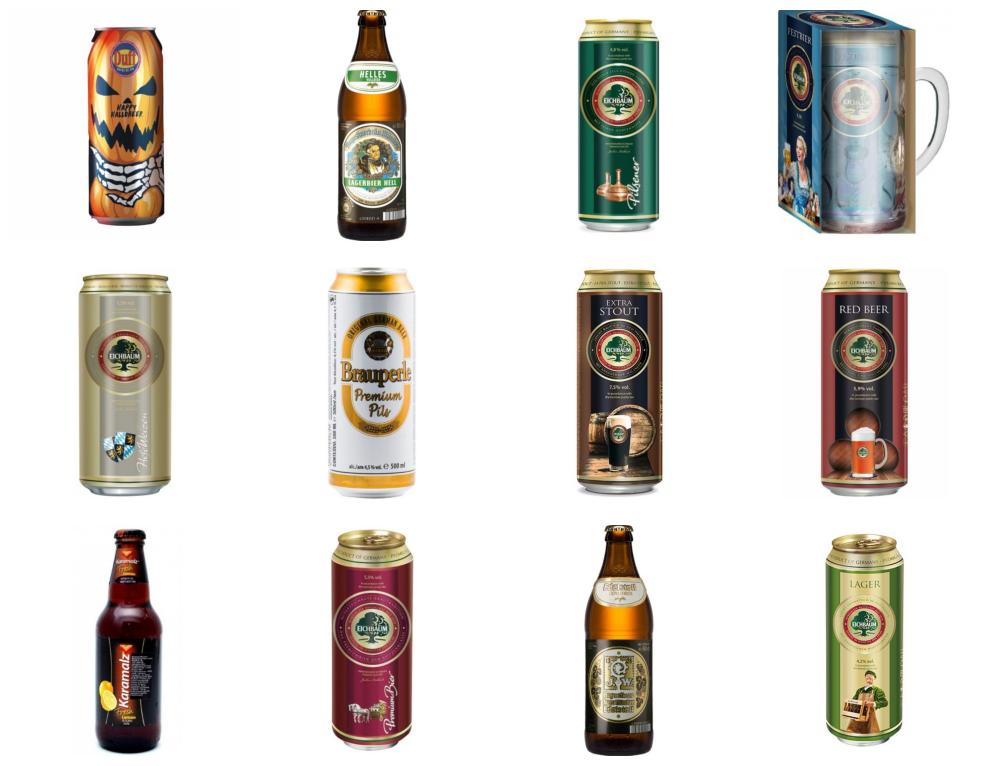

In [ ]:
#Вывод изображений

import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

um_images = len(images)
cols = 4
rows = 3

fig, axs = plt.subplots(rows, cols, figsize=(10, 8))

for idx, img_url in enumerate(images):
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    
    ax = axs[idx // cols, idx % cols]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

Если сайт соответсвует требованиям, то тут должно содержаться много полезной информации, которая не попала в карточку товара, но может быть интересна при исследовании. Выберите какую-нибудь часто встречающуюся в описаниях товаров характеристику и попробуйте вытащить информацию о ней с помощью регулярного выржения. Например, для плодовых культур такой харатеристикой может быть срок созревания первых плодов

Характеристика: <font color='violet'> Вкус </font>

Используйте библиотеку `re` и напишите регулярное выражение для выделения данной харатеристики. Опишите, почему выбрано именно такое регулярное выражение и в чем его смысл:

<font color='violet'> 

1) `вкус` - текстовая строка, которая ищет соответсвующее слово

2) `(?:а)` - указывает на то, что буква 'a' может встречаться сразу после слова "вкус"

3) `s` - соответствует любому пробельному символу

4) `+` - указывает на то, что предшествующий элемент (в данном случае пробельный символ) должен встречаться один или более раз

5) `[а-яё- ]` - класс символов, который соответствует любым буквам русского алфавита

6) `+` - указывает на то, что любой из символов в классе должен встречаться один или более раз

</font>

In [ ]:
pattern1 = r'вкус(?:а)?\s+([а-яё\- ]+)'

tastes = []

for description in descriptions:
    match1 = re.search(pattern1, description, re.IGNORECASE)
    if match1:
        taste = match1.group(1).strip()
        tastes.append(f'Вкус {taste}')
    else:
        tastes.append('-')

Оформите полученные данные в датафрейм при помощи `Pandas`. Выведите записи.

In [ ]:
data['Taste'] = tastes
data

,Name,Image,"Volume, ml","Price, RUB",Description,Taste
0,"Duff beer Halloween 0,5 ж/б светлое фильтрован...",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"100,00",DUFF BEER — пиво светлое фильтрованное пастери...,-
1,"Айхбаум Лагер 0,5 ж/б",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"100,00",Частная пивоварня Эйхбаум (Privatbrauerei Eich...,-
2,"Августинер Эдельштоф 0,5 ст 5,6 %",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"260,00","«Edelstoff» — яркий, освежающий лагер, являющи...",-
3,"Айхбаум Премиум Бир 0,5ж 5,5% свет",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"80,00",«Эйхбаум» Премиум Бир был награжден золотой ме...,Вкус с легкой хмелевой горчинкой и гармоничным...
4,"Karamalz Fresh Lemon. Алк. 0% 0,33 стекло",https://vodaipivo.ru/wp-content/uploads/2020/0...,330,"50,00",«Karamalz» Fresh Lemon — безалкогольный солодо...,-
5,"Айхбаум Рэд 0,5ж 5,9% свет",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"85,00",«Eichbaum» Red Beer — пиво рубиново-красного ц...,-
6,"Айхбаум Стаут 0,5ж 7,5% тем",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"85,00",«Eichbaum» Stout — пиво темно-коричневого цвет...,Вкус пива мягкий
7,Brauperle» Pils,https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"85,00",«Brauperle» Premium Pils — светлый немецкий пи...,Вкус пива наполнен тонами солода и фруктов
8,"Айхбаум Хефевайсбир 0,5ж 5,2%",https://vodaipivo.ru/wp-content/uploads/2020/0...,500,"110,00",«Eichbaum» HefeWeizen — светлое пшеничное пиво...,-
9,"Айхбаум Фестбир свет с темным оттенком 0,95ж 5...",https://vodaipivo.ru/wp-content/uploads/2020/0...,950,"500,00",Пиво «Eichbaum» Festbier демонстрирует приятны...,-


Посмотрите на колонку, которая получилась после парсинга описания с помощью регулярных выражений и **ответьте на вопросы**:
1. Сколько получилось заполненных ячеек? Сколько это составляет процентов от общего количества?
2. Во всех ли ячейках адекватная информация?
3. Если что-то некорректно заполнилось, то почему такое произошло?

<font color='violet'>

1) Все колонки изначального списка `columns` удалось заполнить на 100 %. Последняя колонка, полученная с помощью регулярного выражения заполнена на 3 строки из 12, то есть на 25 %

2) Во всех ячейках корректная информация

3) Низкий процент заполнения по данному выражению объясняется тем, что не во всех описаниях присутсвует данная характеристика 

</font>

# Часть 2. Изучение ограничений парсинга. 1 балл.

В рамках изучения конкурентов мы также узнали, что у них есть магазины **на Ozon**. Преисполнившись уверенностью после легкого парсинга сайта-магазина конкурентов, мы решили, что теперь мы готовы парсить большие маркетплейсы. В следующих ячейках попробуй проделать те же шаги, которые делались в части 1 этой лабораторной работы.

Запишем ссылку на товар компании-конкурента. Попробуем обратиться к ней через response; после этого посмотрим на ответ. Если в ответе есть русские символы, то проверим кодировку - чтобы они корректно отображались, строка должна быть в utf-8. Для этого могут помочь методы `encode` и `decode`.

Примеры подходящих ссылок согласно примерам из части 1 этой лабораторной:

- Семена кабачков 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'

In [ ]:
url_ozon = 'https://www.ozon.ru/product/chipsy-kartofelnye-lay-s-so-vkusom-malosolnye-ogurchiki-s-ukropom-140-g-1525503021/?asb=SFLqWALcLGV90vdYkeKmo8DuJ6K%252BsZqd6RpZsFtkdfM%253D&asb2=RGCyQInOwbvKVkYx0CWxC_7u2IyAJA1CyTlRgR3d2O9by4e3RSQCDcPkVJo0Zn_tmY63Ce2qEnX6-mlzCU8i6A&avtc=2&avte=1&avts=1733659836&ectx=1&keywords=%D1%87%D0%B8%D0%BF%D1%81%D1%8B&miniapp=supermarket'
response = requests.get(url_ozon)

Выведи текст ответа

In [ ]:
response.text

'\n\n    <!DOCTYPE html><html lang="ru"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1"><meta name="robots" content="noindex, nofollow"><link rel="stylesheet" href="https://cdn1.ozone.ru/s3/abt-complaints/static/v1/common.css"><style>.con {overflow: auto;margin: auto;}  .mc {max-width: 420px;padding: 0 16px;overflow: auto}  .bc {padding-top: 32px}  h1 {margin: 24px 0 8px 0}  .tc {padding: 8px 0}  ul {margin: 8px 0 8px 0;padding-left: 24px}  .h {font-size: 12px;line-height: 16px;color: rgba(0, 26, 52, .6)}  .rb {margin-bottom: 16px}  .sb {background-color: transparent;color: var(--ctrlPrimary);padding: 6px}  .sb:hover {color: var(--hoverPrimary)}  .im {margin-left: -16px;width: 144px}  @media (max-width: 375px) {  .im {width: 104px}  h1 {margin-top: 20px;font-size: 20px;line-height: 24px}  .bc {padding-bottom: 50px}  .tc {color: rgba(0, 26, 52, .6)}  }</style><title>Ð\x94Ð¾Ñ\x81Ñ\

Какую страницу вывело? Та ли эта страница, которая доступна по ссылке в браузере?

Изучи в интернете, что привело к такому результату и какие есть способы обхода этой ошибки. **Результаты опиши в выводе к этой части.**

Выводы: <font color='violet'> 

Многие современные веб-сайты используют JavaScript для динамической загрузки контента. Когда вы запрашиваете страницу с помощью requests, вы получаете только статический HTML-код, который может не содержать все данные, загружаемые через JavaScript.

Возможный способ обхода данной проблемы: использование библиотеку Selenium, которая позволяет управлять браузером программно и получать полностью загруженные страницы.

</font>

# Часть 3. Парсинг динамического контента при помощи регулярных выражений. 1 балла.

Теперь, когда мы поняли, что ребята продают, важно понять как они это продают. У веб-магазинов часто есть странички в соцсетях для продвижения бренда. **Главная задача в этой части работы - проанализировать контент.** Для этого будем использовать ютуб :)

Найдите ютуб-канал вашего интернет-магазина. Если такого нет, то подойдет любой канал со схожей тематикой

Название канала: <font color='violet'> Cheers! | Напитки </font>

<font color='violet'> Рассмотрим данный канал, чтобы выяснить, какие напитки помимо нашего основного продукта имеют спрос у клиентов </font>

Сохраните ссылку на страничку с роликами на этом канале

In [ ]:
url = 'https://www.youtube.com/@cheersdrinks/videos'

In [ ]:
response = urlopen(url)
html = response.read()
html = html.decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

Распарсьте страничку с помощью `bs4` и выведите список видео этого канала


Для парсинга можно использовать различные подходы

Используя знания о том, что `html` документ - это дерево, попробуйте достать названия видео, как вы извлекали характеристики товаров в предыдущей части. Здесь постарайтесь не использовать регулярные выражения или поясните, почему не получается извлечь информацию без них

<font color='violet'>`bs4` плохо подходит для работы с сайтами, имеющими динамическую подгрузку контента. Выполнить предыдущие 2 задания не получилось без регулярных выражений</font>

Используя регулярные вырежения извлеките названия видео из целого `html` документа

In [ ]:
pattern = r'<a[^>]*title="([^"]+)"'

video_titles = re.findall(pattern, html)

titles = []

for i, title in enumerate(video_titles, start=1):
    titles.append(title)

titles

Напишите выводы, отвечая на следующие вопросы

1. Какой из рассмотренных методов в данной ситуации подходит лучше и почему?
2. Получилось ли у вас загрузить все видео с канала за один запрос? Поясните полученные результаты
3. Когда стоит использовать регулярные выражения, а когда хождение по дереву с помощью `bs4`? Приведите примеры
4. С какими проблемами вы столкнулись во время работы и почему они возникли?

<font color='violet'>

1) Лучше всего подошёл метод регулярных выражений, хотя далее в лабороторной работе следует более подходящие методы

2) Все видео не получилось загрузить. Причина: динамическая работа сайта

3) `bs4` лучше использовать для парсинга статических данных. Регулярные выражения оказались эффективны и в нашем случае

4) Опять же: сложность парсинга посредством `bs4` и недосбор информации с сайта

</font>

# Часть 4. Парсинг динамическго контента при помощи selenium. 2 балла.

Немного магии из интеренета, чтобы другая магия заработала

In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.6 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [858 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,127 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,410 kB]
Hit:13 https://ppa.lau

In [ ]:
#!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

In [ ]:
# set up the webdriver

driver = webdriver.Chrome(options=chrome_options)

In [ ]:
driver.get(url)

Используя библиотеку `BY` найдите названия видео

In [ ]:
titles = []

video_titles = driver.find_elements(By.CSS_SELECTOR, 'a#video-title-link')
for i, title in enumerate(video_titles, start=1):
    titles.append(title.text)
    
print(titles)
print(len(titles))

Получилось ли загрузить все видео? Почему?

<font color='violet'>

Получилось загрузить лишь 30 видео из 208 на канале. Это связано с тем, что YouTube использует динамическую подгрузку контента

</font>

Используя методы `selenium` сделайте так, чтобы прогрузилась вся страничка с видео канала и соберите названия видео

In [ ]:
last_height = driver.execute_script("return document.documentElement.scrollHeight")

time.sleep(5)
SCROLL_PAUSE_TIME = 2

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

titles = []
video_titles = driver.find_elements(By.CSS_SELECTOR, 'a#video-title-link')
for i, title in enumerate(video_titles, start=1):
    titles.append(title.text)

print(titles)
print(len(titles))

Какая еще информация может быть полезна при анализе конкурентов? Попробуйте достать эту информацию с канала с помощью библиотеки `selenium` и поясните, почему вам нужны именно эти данные:

<font color='violet'> Важно знать колличество просмотров видео конкурента, чтобы понимать какой существует спрос на его продукцию. Также получим дату загрузки каждого видео на сервис, чтобы оценить активность конкурента в медиа поле </font>


 Прежде чем приступить к заданию предложите другие методы получения этих данных и подумайте, почему вам необходимо использовать именно `selenium`:


<font color='violet'> Это задание, возможно, может быть выполнено с помощью парсинга статических данных с использованием `bs4`. Но для работы с динамическим контентом и эмуляции действий пользователя нам необходим функционал `selenium` </font>

Теперь, когда вы понимаете, что и зачем вы будете делать, можно приступать. Напишите необходимый код

In [ ]:
last_height = driver.execute_script("return document.documentElement.scrollHeight")

time.sleep(5)
SCROLL_PAUSE_TIME = 2

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

views = []
dates = []

video_titles = driver.find_elements(By.CSS_SELECTOR, 'span.inline-metadata-item')
for i, param in enumerate(video_titles, start=1):
  if i % 2 == 0:
    views.append(param.text)
  else:
    dates.append(param.text)

for i in range(len(titles)):
  print(titles[i], ' ', views[i], ' ', dates[i])

In [ ]:
driver.quit()

<font color='red'> Не забудь закрыть сессию браузера selenium! Каждый день умирают 10 морских котиков из-за того, что беспечные программисты забывают закрывать сессии и чистить за собой данные. Если не закроешь - снимем много баллов! </font>

Сделайте выводы:

1. Какова тематика канала? Какой контент преобладает на канале?
2. Если бы вы создавали аналогичный магазин, с каким содержанием ролики вам стоило бы выпускать?
3. Какие выводы вы можете сделать из собранных вами данных? Оказались ли эти данные полезны или стоило потратить время на сбор другой информации?

<font color='violet'>

1) Тематика: различные напитки. Контент: обзор напитков

2) С подобным содержанием

3) Да, данные полезны. Мы узнали, что видео нашего конкурент не выкладывает видео несколько лет и имеет маленькое колличество просмторов. Это означает, что магазин не составит конкуренции на данной платформе и можно инвестировать в рекламу и создание контента на YouTube

</font>

# Часть 5. Получение контента через API. 2 балла.

На семинарах изучались основы взаимодействия с API (если не уверены в своих силах, сейчас самое время погуглить про API самим в интернете). Изучите документацию `API YouTube`, чтобы получить комментарии под видео конкурента через API.

Теперь должно быть примерно понятно, как создать ключ для API. Аутентификация здесь не понадобится, нужен только ключ.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из частей 3-4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

<font color='violet'> Рассмотрим видео с другого канала, но на ту же тематику (из необходимости в 1000+ комментариях)</font>

In [ ]:
yt_api_key = 'MY_API_TOKEN'

Теперь выбери видео про товар конкурента, в котором **больше тысячи комментариев**. Давай попробуем получить их. Для начала достаточно получить лишь начальные комментарии каждого треда (посмотри в документации `YouTube API`, что такое `commentThreads`).

В следующей ячейке укажи ссылку на видео (скопируй из адресной строки браузера) и получи из неё ID видео.

In [26]:
video_url = 'https://www.youtube.com/watch?v=Y2yOa8j4UTc'
video_id = 'Y2yOa8j4UTc'

Теперь надо на основе ID видео и ключа API легко получить запрос API, который нам вернёт инфрмацию в формате JSON. Сформируем ссылку, в которой будут находиться необходимые параметры и напишем запрос. Выведем, что вернул запрос

In [27]:
url_method = f'https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&videoId={video_id}&key={yt_api_key}'

In [ ]:
# Взято из официальной документации к YouTube API

import googleapiclient.discovery

youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey = yt_api_key)

request = youtube.commentThreads().list(part="snippet,replies", videoId=video_id)
response = request.execute()
print(response)

{'kind': 'youtube#commentThreadListResponse', 'etag': 'wUfoYNv24XBVUh32iUROyh1w6AM', 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpb0lCZ0FFZ1VJaUNBWUFCSUZDSWNnR0FBU0JRaWRJQmdCSWc0S0RBajgwYi0wQmhDWTJyVENBUQ==', 'pageInfo': {'totalResults': 20, 'resultsPerPage': 20}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'Bba0x1w1t9G5n64Gl4G6L7aoks8', 'id': 'UgwRTel9LfZ453UB9pl4AaABAg', 'snippet': {'channelId': 'UCGLsHbMw8WCOB6tu0sKyG9w', 'videoId': 'Y2yOa8j4UTc', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'zP40mp59wHk3NqSIHH4Ue3jSzD8', 'id': 'UgwRTel9LfZ453UB9pl4AaABAg', 'snippet': {'channelId': 'UCGLsHbMw8WCOB6tu0sKyG9w', 'videoId': 'Y2yOa8j4UTc', 'textDisplay': 'Качай World of Warships и Играй бесплатно на ПК - <a href="https://wo.ws/3KJnmEB">https://wo.ws/3KJnmEB</a> и на Консолях: World of Warships: Legends\r<br>(Важно!) Если ссылка не открывается - отключите adblock.', 'textOriginal': 'Качай World of Warships и Играй бесплатно на ПК - https:

In [31]:
comments = []

for item in response.get('items', []):
    comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
    comments.append(comment)
print(comments)
print(len(comments))

['Качай World of Warships и Играй бесплатно на ПК - <a href="https://wo.ws/3KJnmEB">https://wo.ws/3KJnmEB</a> и на Консолях: World of Warships: Legends\r<br>(Важно!) Если ссылка не открывается - отключите adblock.', 'ПИВООООООООООООООО', 'Люди пачали бухать еще до того как додумались писать и считать', 'Воооот я же говорил что я стремлюсь стать цивилизованным а мне все фу алкаш алкаш! неучи!', 'Знаете я тоже своего рода шумер))', 'А про вино будет?', 'Прогресс воистину невозможен без пива, поэтому я пью квас', 'Когда вторая пчелиная война? А ой не туда. Когда табак два? Во теперь правило', 'НА МЕНЯ ГЛЯДИТ РЕЗВИВО,ПИВО ПИВО ПИВО ПИВО', 'Если не выйдет табак 2, я лично приду к мудренычу и оттарабаню его', 'Получается, что земледелие и прочие ремесла появились вследствие сухого закона в древнем мире? Храм зажал пиво?Нет пива? И люди такие: пойдем херней страдатт😂😂😂', 'А сейчас говорят пить вредно. Вон, набухались пирамиды построили. 😂😂😂', 'Вчера с пиво начали коньяком закончили 😂', '💀 💀 :

Сколько комментариев получилось спарсить в рамках одного запроса? Это все комментарии, которые есть на страничке?

Какой есть ключ в ответе на запрос, чтобы получить больше комментариев?

<font color='violet'>
За один запрос получилось спарсить 20 комментариев из 1500+ под видео
</font>

Дело осталось за малым. Укажем, какой максимум комментариев можно получить за один запрос; допишем код в цикле, чтобы получить все комментарии и положить их в список `comments_lst`.  

В цикле **обязательно** используй try и catch, чтобы ловить ошибки - глюки и ошибки случаются, будет неприятно, если это повлияет на код

In [39]:
RESULTS_AM = 20
curr_results = RESULTS_AM
nextPageToken = ''
comments_lst = []


In [40]:
while (curr_results == RESULTS_AM):
    try:
        cnt = 0
        request = youtube.commentThreads().list(part="snippet,replies", videoId=video_id, maxResults=curr_results, pageToken=nextPageToken)
        response = request.execute()
        for item in response.get('items', []):
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments_lst.append(comment)
            cnt += 1

        curr_results = cnt
        nextPageToken = response.get('nextPageToken', '')
        if not nextPageToken:
            break
        
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        break


In [41]:
len(comments_lst)

1658

In [42]:
comments_lst

['Качай World of Warships и Играй бесплатно на ПК - <a href="https://wo.ws/3KJnmEB">https://wo.ws/3KJnmEB</a> и на Консолях: World of Warships: Legends\r<br>(Важно!) Если ссылка не открывается - отключите adblock.',
 'ПИВООООООООООООООО',
 'Люди пачали бухать еще до того как додумались писать и считать',
 'Воооот я же говорил что я стремлюсь стать цивилизованным а мне все фу алкаш алкаш! неучи!',
 'Знаете я тоже своего рода шумер))',
 'А про вино будет?',
 'Прогресс воистину невозможен без пива, поэтому я пью квас',
 'Когда вторая пчелиная война? А ой не туда. Когда табак два? Во теперь правило',
 'НА МЕНЯ ГЛЯДИТ РЕЗВИВО,ПИВО ПИВО ПИВО ПИВО',
 'Если не выйдет табак 2, я лично приду к мудренычу и оттарабаню его',
 'Получается, что земледелие и прочие ремесла появились вследствие сухого закона в древнем мире? Храм зажал пиво?Нет пива? И люди такие: пойдем херней страдатт😂😂😂',
 'А сейчас говорят пить вредно. Вон, набухались пирамиды построили. 😂😂😂',
 'Вчера с пиво начали коньяком закончил

Изучи полученный список комментариев `comments_lst`. Сделайте выводы:

1. Как люди реагируют на содержание ролика? Что они отмечают в комментариях чаще всего, что было бы важно для вас как человека, открывающего магазин в этой сфере?
2. Предложите метод(-ы) фильтрации неинформативных комментариев. Какая ожидается точность, много ли комментариев на самом деле нужных будет отсеяно? Какие есть ограничения у метода(-ов)?
3. Сравните применение API и скрапинга динамической страницы при помощи selenium (комментарии YouTube так же можно скрапить, как вы делали в части 4). Какие ограничения у способов, какой вам нравится больше?

<font color='violet'>

1) Комментарии подтверждают высокий спрос на пиво и продукцию, связанную с ним

2) Методы фильтрации:

- Ключевые слова и стоп-слова

- Регулярные выражения:

- Оценка длины текста:

  Подобные простые способы фильтрации могут пропустить информативные комментарии. Ограничение состоит в том, что требуется настройка под контекст данных

3) Для стабильного и структурированного извлечения данных лучше использовать API. Для данных, которые API не предоставляет (например, скрытые элементы, пользовательский интерфейс), можно использовать Selenium, но это требует больше времени и ресурсов. Мне было комфортнее работать с API, так как оно быстрее и надёжнее. Но Selenium может быть полезен для изучения нестандартных данных, если API недостаточно.

</font>

# Выводы. 1 балл

В рамках выводов тебе нужно:
- Подытожить результаты экспериментов в частях 1 - 5 лабораторной работы
- Объяснить, как каждый из методов, перечисленных в данной лабораторной работе, используется на практике, какие у него ограничения. Приведи примеры.
- Поделиться впечатлениями от лабораторной работы - что тебе понравилось,  что узнал нового; а что далось тяжелее всего.

<font color='violet'>

1) Все способы были в той или иной степени успешны: с помощью каждого была получена необходимая информация

2) Методы:
- `bs4` - хорошо подходит для парсинга HTML, но не в случаях с динамической подгрузкой

- `re` - удобный способ для поиска нужной информации

- `selenium` - подходит для работы с динамическим контентом и эмуляцией действий пользователя

- API - комфортный, безопасный и легальный способ для стабильного и структурированного извлечения данных 

3) Лабороторная работа полезный опыт и, на самом деле, интересное занятие. Эта работа понравилась больше, чем первая. Она показалась сложнее и серьёзнее

</font>